# Capstone Project: Star Trek IMDB Ratings Predictor - Katya Kogan - Part 2
--- 
## Introduction

Now we've successfully cleaned and prepared our data, we can begin our modelling process to determine if the characters (by their spoken parts) contribute to the `RATING`. 

Since we are focusing on feature importance, our models will have to be carefully chosen, as this is a regression problem - so we'll use Regression models such as: Linear Regression, Decision Tree Regressor, Random Forest Regressor, SVM (Regressor), OrdinalRidge Regression (MORD), Least Absolute Deviation (MORD), and Gradient Boosting Regressor. 

We'll be performing baseline tests across these models, and then find the one performs that best and fine-tune parameters, which afterwords - we'll evaluate them and plot the results. 

We'll begin by importing all the relevant libraries needed for our project. 

In [101]:
# importing the basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import shap
%matplotlib inline
#ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#Importing Mord library
from mord import LogisticIT, LogisticAT, LAD, OrdinalRidge

# libraries for splitting and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model as lm, metrics, tree, ensemble, model_selection as ms, feature_selection, svm

import time 
# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

#give better plot style
plt.style.use('ggplot')

With our libraries imported, we can begin by reading in our dataset, do some minor EDA and prep before starting to fit our models. 

In [2]:
ST_df = pd.read_csv(r"C:\Users\Katya\Documents\GitHub\Capstone-Project---BrainStation\PCT_Graph.csv")

In [3]:
ST_df.head()

,Unnamed: 0,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,WESLEY_PCT,GUINAN_PCT,TASHA_PCT,PULASKI_PCT,RATING
0,0,33.46,31.58,10.44,1.69,0.00,4.26,5.21,6.05,0.0,4.52,0.0,2.79,0.00,8.000000
1,1,11.47,3.01,26.08,25.44,14.94,4.23,14.82,0.00,0.0,0.00,0.0,0.00,0.00,7.996689
2,2,27.32,42.75,7.88,8.60,0.00,0.00,0.00,0.00,0.0,10.20,0.0,0.00,3.25,8.000000
3,3,39.13,24.34,11.60,1.94,3.09,0.92,16.36,0.00,0.0,2.63,0.0,0.00,0.00,7.000000
4,4,41.64,9.67,18.77,5.32,2.31,5.44,16.85,0.00,0.0,0.00,0.0,0.00,0.00,7.000000


Now we've successfully imported our dataframe, we can see that there is still some minor cleaning to do. We'll have to drop the `Unnamed: 0` column. 

In [4]:
# dropping the Unnamed: 0 column
ST_df.drop(labels='Unnamed: 0', inplace=True, axis=1)

In [5]:
# sanity check
ST_df.head()

,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,WESLEY_PCT,GUINAN_PCT,TASHA_PCT,PULASKI_PCT,RATING
0,33.46,31.58,10.44,1.69,0.00,4.26,5.21,6.05,0.0,4.52,0.0,2.79,0.00,8.000000
1,11.47,3.01,26.08,25.44,14.94,4.23,14.82,0.00,0.0,0.00,0.0,0.00,0.00,7.996689
2,27.32,42.75,7.88,8.60,0.00,0.00,0.00,0.00,0.0,10.20,0.0,0.00,3.25,8.000000
3,39.13,24.34,11.60,1.94,3.09,0.92,16.36,0.00,0.0,2.63,0.0,0.00,0.00,7.000000
4,41.64,9.67,18.77,5.32,2.31,5.44,16.85,0.00,0.0,0.00,0.0,0.00,0.00,7.000000


Great, we've dropped the unnecessary column. Let's take a quick look at the rating distribution, once more. 

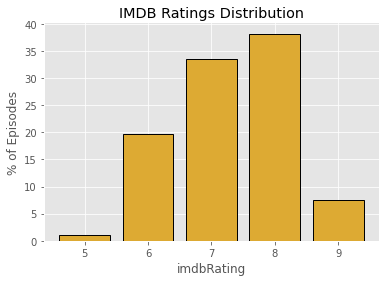

In [384]:
# looking at the distribution of the IMDB Ratings
values_x, counts = np.unique(ST_df['RATING'], return_counts=True)
normalized_reviews = counts/counts.sum()

plt.figure()
plt.bar(values_x, normalized_reviews * 100, edgecolor='black', color='#ddaa33', linewidth=1)
plt.xlabel('imdbRating')
plt.ylabel('% of Episodes')
sns.despine()
plt.title("IMDB Ratings Distribution")
plt.savefig("IMDB Ratings Distribution")
plt.show()

Now we'll take a renewed look at the `RATING` column, and make sure all the values are rounded up correctly (and remains a float). 

In [7]:
# double check
ST_df['RATING'].unique()

array([8.        , 7.99668874, 7.        , 6.        , 9.        ,
       5.        ])

In [8]:
# rounding up the rating values
ST_df['RATING'] = round(ST_df['RATING'])

In [9]:
# sanity check 
ST_df['RATING'].unique()

array([8., 7., 6., 9., 5.])

In [10]:
# check the type
ST_df['RATING'].dtype

dtype('float64')

In [378]:
ST_df.head(10)

,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,WESLEY_PCT,GUINAN_PCT,TASHA_PCT,PULASKI_PCT,RATING
0,33.46,31.58,10.44,1.69,0.00,4.26,5.21,6.05,0.0,4.52,0.0,2.79,0.00,8.0
1,11.47,3.01,26.08,25.44,14.94,4.23,14.82,0.00,0.0,0.00,0.0,0.00,0.00,8.0
2,27.32,42.75,7.88,8.60,0.00,0.00,0.00,0.00,0.0,10.20,0.0,0.00,3.25,8.0
3,39.13,24.34,11.60,1.94,3.09,0.92,16.36,0.00,0.0,2.63,0.0,0.00,0.00,7.0
4,41.64,9.67,18.77,5.32,2.31,5.44,16.85,0.00,0.0,0.00,0.0,0.00,0.00,7.0
5,39.27,6.10,14.12,4.62,4.90,11.55,7.46,9.44,0.0,0.00,0.0,2.54,0.00,8.0
6,42.47,18.29,8.61,2.45,3.18,9.29,2.80,10.24,0.0,2.67,0.0,0.00,0.00,7.0
7,12.80,26.11,18.57,2.77,10.22,13.69,6.21,0.00,0.0,2.23,0.0,7.39,0.00,6.0
8,8.72,15.11,0.94,4.65,0.03,12.74,25.84,31.97,0.0,0.00,0.0,0.00,0.00,6.0
9,30.28,26.48,3.75,3.80,1.84,33.85,0.00,0.00,0.0,0.00,0.0,0.00,0.00,7.0


#### Correlation Heatmap

Before moving forward, let's take a higher view of the this dataframe. We'll plot a heatmap. 

Text(0.5, 1.0, 'Correlation Heatmap of Characters and the Rating Score')

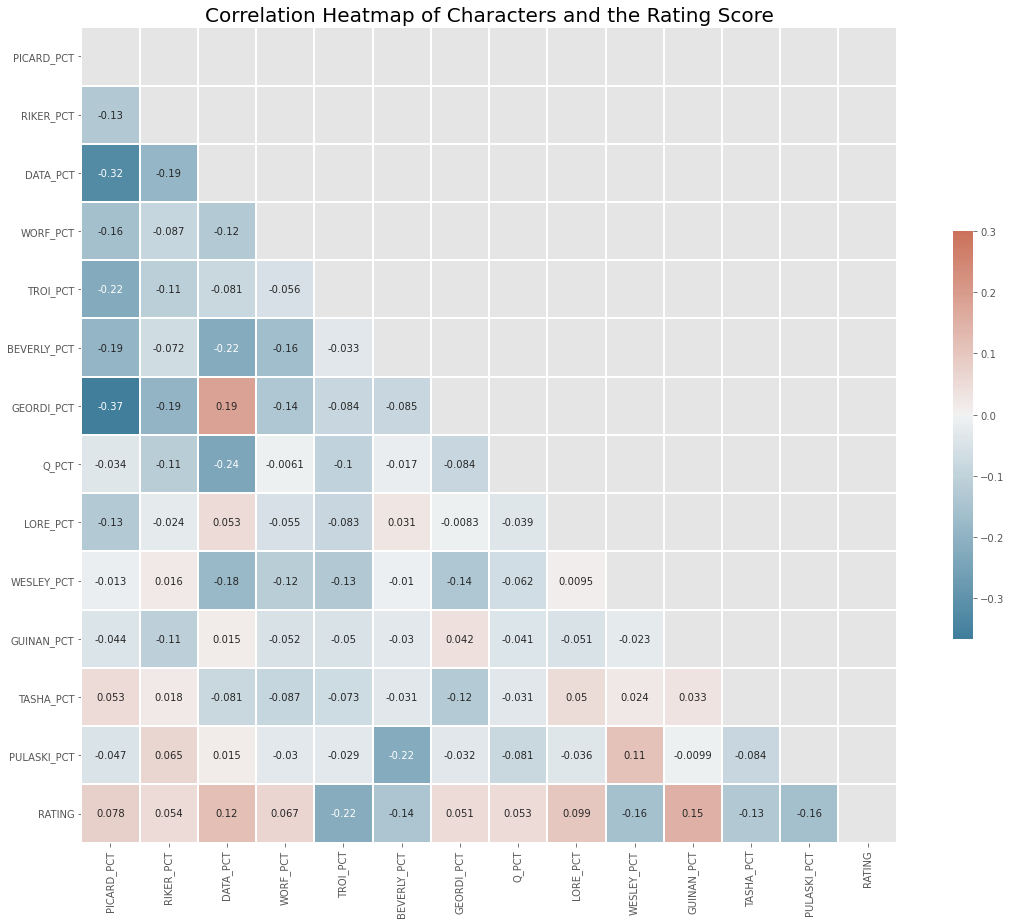

In [382]:
# Compute the correlation matrix
corr = ST_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True)
plt.title('Correlation Heatmap of Characters and the Rating Score', size=20)

By having a quick look, we can see that the characters that have a higher correlation coefficient are, `DATA_PCT`, and `GUINAN_PCT`. The ones that are negatively correlated are, `TROI_PCT`, `WESLEY_PCT`, `TASHA_PCT`, and `PULASKI_PCT`. I would be curious to see if our models will reflect this. 

Moving on, we can be confident going ahead with splitting the data set into train and test sets. After the splitting is completed, the training set(s) will be fit and transformed. Sidenote: the testing data shouldn't be mixed with the fit and transformation of the data. The fitting and transformation process will be applied separately to the `RATING` column.

Essentially:


1. Split `ST_df` into train and test sets
2. With the fitted `RATING`, transform the `RATING` column for both X_train and X_test

We'll begin by defining our X and y values:

X : all columns except for `RATING` (independent)
y : contains only `RATING` (dependent)

In [11]:
# separate df into features and target variable
y = ST_df['RATING']
# drop the target variable from the X dataframe (remaining features)
X = ST_df.drop('RATING',axis=1)

Now that we've separated the independent and dependent variables from each other, now we'll performing a train test split using a test size of 30%.

In [12]:
# split the data into train and test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7, shuffle=True)

In [13]:
# class proportion in the original
print("Original Data Proportions")
print(y.value_counts()/len(y), '\n')

# class proportion in the training data
print("Training Data Proportions")
print(y_train.value_counts()/len(y_train), '\n')

# class proportion of the testing data
print("Testing Data Proportions")
print(y_test.value_counts()/len(y_test), '\n')

Original Data Proportions
8.0    0.381503
7.0    0.335260
6.0    0.196532
9.0    0.075145
5.0    0.011561
Name: RATING, dtype: float64 

Training Data Proportions
8.0    0.380165
7.0    0.338843
6.0    0.198347
9.0    0.074380
5.0    0.008264
Name: RATING, dtype: float64 

Testing Data Proportions
8.0    0.384615
7.0    0.326923
6.0    0.192308
9.0    0.076923
5.0    0.019231
Name: RATING, dtype: float64 



It's good practice to standardise the predicative variables, especially for linear regressions. We'll fit and transform on the training set, and transform on the testing set. 

In [14]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
print("Length of training sets:",len(X_train), len(X_test))
print("Length of testing sets:",len(y_train), len(y_test))

Length of training sets: 121 52
Length of testing sets: 121 52


### Modelling Workflow 

Now that we've successfully split the data set into their respective train and test datasets, we can commence comfortably with modelling. 

Our workflow will be:
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- SVM Regressor
- OrdinalRidge Regression
- LAD 

Let's start with the baseline models, determine which ones perform the best and then start tuning the hyperparameters. Since we're testing a myriad of models, I wanted create a function where it'll take in the train-test data, and the model type in order to return the default model scores. It'll return the train-test scores (using RMSE as an evaluation metric), cross validation scores, and the mean cross validation score. 

I looked online to see if others have attempted to create a function for optimizing the workflow of obtaining the appropriate model metrics. I was inspired by this [article](https://jazpeng.github.io/predict_movie_ratings/), which was written by an experienced Data Scientist, and I modified the function for my needs. I wanted to append the results of the metrics to an empty list to be able to refer to the results, which was added inside the function. 

Let's create our simple model metrics function, as well as our empty lists to store the results. 

In [15]:
# creating our lists to store the results of our default models 
training_score = []
testing_RMSE = []
mean_cross_val_score = [] 


In [105]:
# Function to return simple model metrics
def simple_model_metrics(X_train, y_train, X_test, y_test, model, parametric=True):
    '''Takes in train test splits and the model type, and returns the training and test score (RMSE),
    cross-validation scores, and the mean cross-validation score. Returns the feature importances if the 
    argument "parametric" is True or False''' 
    
    # fit the model
    model.fit(X_train, y_train)
    
    # predict the models
    train_pred = np.around(model.predict(X_train),1)
    test_pred = np.around(model.predict(X_test),1)
    
    # obtain the RMSE score from train and test 
    train_rmse = metrics.mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = metrics.mean_squared_error(y_test, test_pred, squared=False)
    
    
    # print results using RMSE for train and test scores
    print('Training RMSE: ', '{0:0.2f}'.format(train_rmse))
    print('Testing RMSE: ', '{0:0.2f}'.format(test_rmse))
    
    # append train and testing scores to list
    training_score.append('{0:0.2f}'.format(train_rmse))
    testing_RMSE.append('{0:0.2f}'.format(test_rmse))
    
    # acquire the cross validation score (neg mean squared error), 5 folds
    cv_scores = -ms.cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    
    # print results of the cross val RMSEs, and the mean cross val RMSE
    print('Cross-validated RMSEs: ', np.sqrt(cv_scores))
    print('Mean cross-validated RMSE: ', '{0:0.2f}'.format(np.sqrt(np.mean(cv_scores))))
    
    # appending mean cross val RMSE to list
    mean_cross_val_score.append('{0:0.2f}'.format(np.sqrt(np.mean(cv_scores))))
    
    # conditions if parametric is true or false 
    if parametric == True:
        # prints a dataframe containing the X train cols, model coefficients and absolute coefficient (applies to models that don't have feature_importances or coef_)
        print(pd.DataFrame(list(zip(X_train.columns, model.coef_, abs(model.coef_))), 
                 columns=['Feature', 'Coef', 'Abs Coef']).sort_values('Abs Coef', ascending=False).head(10))
    else:
        # prints a dataframe containing the X train cols and model feature importances
        print(pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)), 
                 columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))
    


#### Baseline RMSE
With our function created, now we can use it quite simply and with ease. However, we don't know what baseline to compare the RMSE scores with. This score explains what you would get if the mean value for the `y` was predicted. Essentially, if the model does better than this score - it's a good start! 

Let's check what the baseline is. 

In [17]:
y_pred_mean = [y_train.mean()] * len(y_test)

print("Baseline score RMSE: ",'{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean))))

Baseline score RMSE:  0.93


The baseline score is an RMSE of 0.93, meaning that the predicted score is within 0.93 of a mark out of 1. This is a baseline to compare the performance of my models. The current RMSE suggests that there is variance in the data that would lead to this outcome. 

Since this is a regression problem, we're referring to the Root Mean Squared Error as our score dimension. We'll be focusing on the models that have the best performing cross-validation scores, while taking into consideration of the training and test scores (checking for underfitting or overfitting). To intrepret the RMSE, the rule of thumb is that if the RMSE is near 1, it means that the predictions are off by a margin of 1 (example, the actual value is 5, and the prediction is 6). The same goes for the other direction as well, the closer the RMSE is to 0 - the more accurate our predictions are.  

To start us off, we'll begin with a few simple models and compare their scores (default). Once we determine which one performs the best, we'll dive into it a bit deeper with a pipeline. 


#### Linear Regression

In [18]:
linear_default = simple_model_metrics(X_train, y_train, X_test, y_test, LinearRegression())
linear_default


Training RMSE:  0.81
Testing RMSE:  0.87
Cross-validated RMSEs:  [1.00181826 0.96974392 0.99922123 0.95171278 0.98963228]
Mean cross-validated RMSE:  0.98
        Feature        Coef    Abs Coef
0    PICARD_PCT -213.374965  213.374965
2      DATA_PCT -160.190173  160.190173
6    GEORDI_PCT -139.984872  139.984872
5   BEVERLY_PCT -134.309799  134.309799
1     RIKER_PCT -125.320469  125.320469
4      TROI_PCT -123.563818  123.563818
3      WORF_PCT -118.513233  118.513233
7         Q_PCT -104.318121  104.318121
9    WESLEY_PCT  -67.013172   67.013172
11    TASHA_PCT  -42.593696   42.593696


But the training and test RMSEs are a bit high, and the cross validation score is higher than our baseline. This suggests that the model is underfit, and regularisation could help with improving these results, but let's explore the other options first before we attempt to tune the parameters. 

#### Decision Tree Regressor

In [19]:
tree_default = simple_model_metrics(X_train, y_train, X_test, y_test, DecisionTreeRegressor(), False)
tree_default

Training RMSE:  0.00
Testing RMSE:  1.34
Cross-validated RMSEs:  [1.07990295 1.09891525 1.20140571 1.18296434 1.05737126]
Mean cross-validated RMSE:  1.13
        Feature  Importance
3      WORF_PCT    0.235306
4      TROI_PCT    0.197689
5   BEVERLY_PCT    0.104360
11    TASHA_PCT    0.079015
2      DATA_PCT    0.069129
1     RIKER_PCT    0.063751
0    PICARD_PCT    0.062168
9    WESLEY_PCT    0.056733
10   GUINAN_PCT    0.053058
6    GEORDI_PCT    0.037815


The training score is 0, and the testing score is exceedingly high. This suggests that this model is extremely overfit. We won't be considering this as an option to persue. 

#### Random Forest Regressor

In [20]:
forest_default = simple_model_metrics(X_train, y_train, X_test, y_test, RandomForestRegressor(), False)
forest_default

Training RMSE:  0.36
Testing RMSE:  0.87
Cross-validated RMSEs:  [1.0126846  0.9307948  0.97944354 0.97088074 0.94280453]
Mean cross-validated RMSE:  0.97
        Feature  Importance
3      WORF_PCT    0.171748
4      TROI_PCT    0.156511
0    PICARD_PCT    0.115068
6    GEORDI_PCT    0.102301
1     RIKER_PCT    0.095176
5   BEVERLY_PCT    0.081970
2      DATA_PCT    0.068940
11    TASHA_PCT    0.062640
9    WESLEY_PCT    0.053612
10   GUINAN_PCT    0.048491


The training and test scores are both lower than the baseline is, including the cross validation score (by 0.01). This is already showing signs of a good fit, and this model is currently our best option. The training RMSE is the closest we've seen to 0 so far. 

#### Support Vector Machines (Regressor)

In [21]:
# instantiate the model
svr_default = svm.SVR()

#fit the model
svr_default.fit(X_train, y_train)

# print results from training and testing RMSE
print('Training RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train, svr_default.predict(X_train)))))
print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, svr_default.predict(X_test)))))

# append train and testing scores to lists
training_score.append('{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train, svr_default.predict(X_train)))))
testing_RMSE.append('{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, svr_default.predict(X_test)))))

# acquire the cross validation scores
cv_scores = -ms.cross_val_score(svr_default, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# printing the results of the cross val scores and the mean cross val score
print('Cross-validated RMSEs:', cv_scores)
print('Mean cross-validated RMSE:', '{0:0.2f}'.format(np.mean(cv_scores)))

# appending mean cross val RMSE to list
mean_cross_val_score.append('{0:0.2f}'.format(np.sqrt(np.mean(cv_scores))))

Training RMSE: 0.62
Testing RMSE: 0.94
Cross-validated RMSEs: [0.88895439 0.88312573 0.81880045 0.85295532 0.90437307]
Mean cross-validated RMSE: 0.87


The training score is lower than our baseline, with the testing score matching the baseline. However, the cross validation score is what's stealing the show. With a RMSE of 0.76, this suggests to me that this model is another worthy contention worth persuing further. 

---

There is a package that is dedicated for Ordinal Regression (goal is to predict a variable that is discrete and ordered). Referring to this [documentation](https://pythonhosted.org/mord/#regression-based), we'll test the defaults of the MORD package and see how it compares against the other models from sklearn. 

#### OrdinalRidge Regression - MORD

In [22]:
mord_ordinal_default = simple_model_metrics(X_train, y_train, X_test, y_test, OrdinalRidge())
mord_ordinal_default

Training RMSE:  0.85
Testing RMSE:  0.93
Cross-validated RMSEs:  [1.03780199 0.97848204 1.0484475  0.94326906 1.03928988]
Mean cross-validated RMSE:  1.01
        Feature      Coef  Abs Coef
10   GUINAN_PCT  0.197785  0.197785
9    WESLEY_PCT -0.185553  0.185553
4      TROI_PCT -0.144367  0.144367
11    TASHA_PCT -0.131599  0.131599
12  PULASKI_PCT -0.102575  0.102575
8      LORE_PCT  0.089497  0.089497
5   BEVERLY_PCT -0.086334  0.086334
1     RIKER_PCT  0.082768  0.082768
3      WORF_PCT  0.062255  0.062255
0    PICARD_PCT  0.058793  0.058793


Even though the training and testing RMSE are lower than our baseline, the cross validation is way too high. We won't be considering this as an option. 

---
#### LAD (Least Absolute Deviation) - MORD

In [23]:
mord_lad_default = simple_model_metrics(X_train, y_train, X_test, y_test, LAD())
mord_lad_default

Training RMSE:  0.88
Testing RMSE:  0.94
Cross-validated RMSEs:  [1.03780199 1.         0.95544279 0.96716821 1.08286839]
Mean cross-validated RMSE:  1.01
        Feature      Coef  Abs Coef
4      TROI_PCT -0.217950  0.217950
11    TASHA_PCT -0.188647  0.188647
10   GUINAN_PCT  0.183033  0.183033
12  PULASKI_PCT -0.177731  0.177731
3      WORF_PCT  0.175660  0.175660
6    GEORDI_PCT  0.137160  0.137160
5   BEVERLY_PCT -0.130366  0.130366
9    WESLEY_PCT -0.119266  0.119266
2      DATA_PCT  0.082253  0.082253
8      LORE_PCT  0.074200  0.074200


The same applies to the LAD model as well, the training and test scores are also a little lower or similar to our baseline, but the cross validation is also too high. This is also another option that we won't consider as well. 

#### Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
gradient_default = simple_model_metrics(X_train, y_train, X_test, y_test, GradientBoostingRegressor(), False)
gradient_default

Training RMSE:  0.30
Testing RMSE:  0.93
Cross-validated RMSEs:  [1.05535721 0.93729338 1.09525058 1.0473655  0.96644177]
Mean cross-validated RMSE:  1.02
        Feature  Importance
3      WORF_PCT    0.158835
4      TROI_PCT    0.157172
0    PICARD_PCT    0.116467
6    GEORDI_PCT    0.102550
1     RIKER_PCT    0.080176
10   GUINAN_PCT    0.079310
9    WESLEY_PCT    0.073657
5   BEVERLY_PCT    0.071688
11    TASHA_PCT    0.071050
2      DATA_PCT    0.037376


Even though the training set is super close to a good fit, but the test and cross-validation scores are questionable. This is a boosted model, and it requires more hyperparameter tuning to see positive results. 

--- 

### Summary of Baseline Simple Models
Now we have tested our baseline regression models, let's take a quick look at the summary of all these default tests and determine which ones performed the best. Remember, our baseline RMSE is 0.94. 

In [381]:
# summary of default/baseline models
summary = pd.DataFrame(data = [training_score,testing_RMSE,mean_cross_val_score], index = ['Training RMSE', 'Testing RMSE', 'Mean Cross Validation Score'])
summary.columns = ['Linear Regression', 
                   'Decision Tree Regressor', 
                   'Random Forest Regressor',
                   'SVM Regressor',
                   'OrdinalRidge (MORD)',
                   'LAD (MORD)',
                   'GradientBoost Regressor']
summary

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,SVM Regressor,OrdinalRidge (MORD),LAD (MORD),GradientBoost Regressor
Training RMSE,0.81,0.00,0.36,0.62,0.85,0.88,0.30
Testing RMSE,0.87,1.34,0.87,0.94,0.93,0.94,0.93
Mean Cross Validation Score,0.98,1.13,0.97,0.93,1.01,1.01,1.02


We're paying close attention to the cross validation scores, and comparing them to our baseline of 0.94. Ideally, we want this number to be as close to 0 as possible, as this means that it's nearing a perfect fit. The ones that shows the most promise are the Random Forest and SVM Regression models, and the ones that severely flopped were the Decision Tree Regressor (this is expected, as they have a tendency to overfit), and the GradientBoost Regressor (which at this stage is too early to tell, as it needs to be optimized further to show promise). 

## Model Optimization

Moving forward, we can see that the Random Forest Regressor performs the best with the baseline model, so we'll be exploring this option and finetune its parameters. Let's take a closer look at the parameter options that we'll be optimizing. 

In [27]:
# get a list of parameters to choose from
rfr = ensemble.RandomForestRegressor(random_state = 5)

list(rfr.get_params())

['bootstrap',
 'ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

### Random Search 

In order to have an idea of which hyperparameters to tune, we need to have a clearer understanding of the pieces that go together in order to optimize the models. 

- `n_estimators` = number of trees in the forest
- `max_features` = max number of features considered for splitting a node
- `max_depth` = max number of levels in each decision tree
- `min_samples_split` = minimum number of data points placed in a node before the node is split
- `min_samples_leaf` = minimum number of data points allowed in a leaf node
- `bootstrap` = method for sampling data points (with or without replacement)

We'll be using the `RandomizedSearchCV()` to help us define our hyperparameter grid that's best to operate in. The parameters selected are a wide range of values from small to a large values to cover an acceptable range of selection that could be considered plausible for a optimal model (I referred to this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to determine the default values, and expanded further from there). 

In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [29]:
# First create the base model to tune
rf = RandomForestRegressor(random_state = 5)
# Random search of parameters, using 5 folds for cross val
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=5, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=5, verbose=2)

In [30]:
# take a look at the best parameters 
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

### Evaluation Function

Before we start attempting to optimize these models, we need to be able to evaluate them correctly and succinctly. In order to optimize our workflow, we'll create an evaluation function to take in the model type and the training-test sets to return us how off the prediction values are compared to the actual values (our target variable, `RATINGS`),we'll be pulling in the $R^2$ score, MSE (Mean Square Error), MAE (Mean Absolute Error), and our handy RMSE score. We're testing models iteratively over and over, and this will save time. 

*But wait, what do these scores mean?* 

`Mean Absolute Error` tells us the absolute diference between the target (`RATING`) value and the value predicted by the model. This metric is considered to be to more reliable as it doesn't judge outliers as much as the MSE (Mean Squared Error) does. It's a linear score, which means that all weights are shared equally. 

`R2 score` also, known as the Coefficient of Determination. This will help us compare the current model with the baseline and tells us how much better it is. The $R^2$ also doesn't care about the values being too large or too small, it ranges from less than or equal to 1. 

`Mean Squared Error` is a simply the average of the squared difference between our target value and the predicted values from the models. While it squares the differences, it judges even tiny errors (which leads to quick judgements of the model performing poorly). 

Finally.. 

`Root Mean Squared Error` has been handy this whole time, and will continued to be used as it takes the square root of the averaged squared difference between the target and the predicted values. We're relying on this as well mainly because we don't really want to have large errors, because the errors are squared first *before* averaging - which dramatically penalizes large errors. 


In [31]:
def evaluate(model, X_test, y_test):
    '''Takes in the model type, X_test and y_test to return the error score, r2 score, mse, and rmse'''
    
    pred = model.predict(X_test)
    
    # our mean absolute error  
    errors = metrics.mean_absolute_error(y_test, pred)
    
    # get r2 score
    r2score = metrics.r2_score(y_test, pred)
    
    # mean squared error 
    mse = metrics.mean_squared_error(y_test, pred)
    
    # root mean squared error
    rmse = metrics.mean_squared_error(y_test, pred, squared=False)
    
    # print results
    print('Model Performance')
    print('-----------------')
    print('Mean Absolute Error: {:0.4f} degrees'.format(np.mean(errors)))
    print('R2 Score: {0:0.2f}'.format(r2score))
    print('Mean Squared Error (MSE): {0:0.2f}'.format(mse))
    print('Root Mean Squared Error (RMSE):', '{0:0.2f}'.format(rmse))
    
    return 

With our evaluation function created, now we can have a good idea of what the baseline should be (before, we knew that the RMSE was 0.94) with an accuracy to compare with. 
We'll test our new function on the baseline version of the `RandomForestRegressor()`. 

In [32]:
base_model = RandomForestRegressor(random_state = 5)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)



Model Performance
-----------------
Average Error (Mean Absolute Error): 0.6579 degrees
R2 Score: 0.19
Mean Squared Error (MSE): 0.70
Root Mean Squared Error (RMSE): 0.84


Immediately, we can see that the baseline model sets a very high standard, with a RMSE score of 0.84! 

Referencing the output of what the RandomSearch suggested, I'm imputing values within the range(s) of the parameters, and attempt to narrow it down further. 

Each model will a similar workflow, where parameters are named ahead of time as a dictionary, and then instantiated a `GridSearchCV()`. After, the model is fitted and then the following steps are executed: 
1. Obtain the best parameters using `best_params_`
2. Return the cross validated score of the model
3. Define the best model metrics with `best_estimator_`
4. Get the RMSE of the test data
5. Print the model's feature importances 
6. Retrieve the model runtime 

#### Model #1 - `grid_search_random`

In [33]:
# define the parameters and their ranges/options
rfr_parameters = {'bootstrap': [True],
                  'max_depth': [80, 90, 100, 110],
                  'max_features': ['sqrt'],
                  'min_samples_leaf': [3, 4, 5],
                  'min_samples_split': [8, 10, 12],
                  'n_estimators': [100, 200, 300, 1000]}


# Instantiate the grid search model
grid_search_random = GridSearchCV(estimator = rfr, param_grid = rfr_parameters, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [34]:
# start the clock
start = time.time()

# Fit the grid search to the data
grid_search_random.fit(X_train, y_train)

# print the best parameters from the gridsearch
print('Best parameters:', grid_search_random.best_params_)
    
# print cross val score for test data 
print('Cross-validated score:', '{0:0.2f}'.format(abs(grid_search_random.best_score_)))

# best model from the grid search (best_estimator_)
best_model = grid_search_random.best_estimator_

# print the testing RMSE from the best model 
print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model.predict(X_test)))))

# prints dataframe containing the X train cols and the best model's feature importances
print(pd.DataFrame(list(zip(X_train.columns, best_model.feature_importances_)), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))

# end the clock
end = time.time()

# get run time
print(f"Runtime: {end - start}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 1000}
Cross-validated score: 0.05
Testing RMSE: 0.86
        Feature  Importance
4      TROI_PCT    0.166034
3      WORF_PCT    0.137033
0    PICARD_PCT    0.117831
1     RIKER_PCT    0.102304
5   BEVERLY_PCT    0.096322
6    GEORDI_PCT    0.089455
2      DATA_PCT    0.080186
11    TASHA_PCT    0.077069
9    WESLEY_PCT    0.072086
10   GUINAN_PCT    0.044273
Runtime: 38.50156927108765


The numbers look promising, looking at the cross-validated score and the RMSE (which are both lower than the baseline of 0.94). However, can we trust it? To find out, we'll run our evaluation function on this model. 

In [35]:
best_grid = grid_search_random.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
-----------------
Average Error (Mean Absolute Error): 0.7106 degrees
R2 Score: 0.14
Mean Squared Error (MSE): 0.74
Root Mean Squared Error (RMSE): 0.86


According the evaluation metrics, the model has a RMSE of 0.86 - which is a little worse than the baseline's 0.84. Despite this, we'll still attempt explore further and find closer parameters. 

For the next model, I'm reducing the range(s) to a lower bracket of the range(s) of the Random Search, and work our way up to the higher parameter values. 

#### Model #2 - `grid_search_1`

In [36]:
# define the parameters and their ranges/options
rfr_parameters = {'bootstrap': [True],
                  'max_depth': [100, 110, None],
                  'max_features': ['sqrt'],
                  'min_samples_leaf': [5,6,7],
                  'min_samples_split': [10, 12, 14],
                  'n_estimators': [100, 125, 150]}

# Instantiate the grid search model
grid_search_1 = GridSearchCV(estimator = rfr, param_grid = rfr_parameters, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [37]:
# start the clock
start = time.time()

# Fit the grid search to the data
grid_search_1.fit(X_train, y_train)

# print the best parameters from the gridsearch
print('Best parameters:', grid_search_1.best_params_)
    
# print cross val score for test data 
print('Cross-validated score:', '{0:0.2f}'.format(abs(grid_search_1.best_score_)))

# best model from the grid search (best_estimator_)
best_model_1 = grid_search_1.best_estimator_

# print the testing RMSE from the best model 
print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model_1.predict(X_test)))))

# prints dataframe containing the X train cols and the best model's feature importances
print(pd.DataFrame(list(zip(X_train.columns, best_model_1.feature_importances_)), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))

# end the clock
end = time.time()

# get run time
print(f"Runtime: {end - start}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 14, 'n_estimators': 100}
Cross-validated score: 0.05
Testing RMSE: 0.87
        Feature  Importance
4      TROI_PCT    0.162959
0    PICARD_PCT    0.147427
3      WORF_PCT    0.145007
1     RIKER_PCT    0.096926
6    GEORDI_PCT    0.094321
2      DATA_PCT    0.093373
9    WESLEY_PCT    0.083167
5   BEVERLY_PCT    0.081385
11    TASHA_PCT    0.060419
10   GUINAN_PCT    0.029442
Runtime: 6.885424375534058


This is promising as well, let's evaluate it. 

In [38]:
best_grid = grid_search_1.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
-----------------
Average Error (Mean Absolute Error): 0.7175 degrees
R2 Score: 0.13
Mean Squared Error (MSE): 0.75
Root Mean Squared Error (RMSE): 0.87


This model performed worse than the previous, let's increase our range a little further and see if that improves. 

#### Model #3 - `grid_search_2`

In [39]:
# define the parameters and their ranges/options
rfr_parameters = {'bootstrap': [True],
                  'max_depth': [100, 150, 200],
                  'max_features': ['sqrt'],
                  'min_samples_leaf': [5,7,9],
                  'min_samples_split': [10, 15, 20],
                  'n_estimators': [125, 150, 175]}

# Instantiate the grid search model
grid_search_2 = GridSearchCV(estimator = rfr, param_grid = rfr_parameters, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)


In [40]:
# start the clock
start = time.time()

# Fit the grid search to the data
grid_search_2.fit(X_train, y_train)

# print the best parameters from the gridsearch
print('Best parameters:', grid_search_2.best_params_)
    
# print cross val score for test data 
print('Cross-validated score:', '{0:0.2f}'.format(abs(grid_search_2.best_score_)))

# best model from the grid search (best_estimator_)
best_model_2 = grid_search_2.best_estimator_

# print the testing RMSE from the best model 
print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model_2.predict(X_test)))))

# prints dataframe containing the X train cols and the best model's feature importances
print(pd.DataFrame(list(zip(X_train.columns, best_model_2.feature_importances_)), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))

# end the clock
end = time.time()

# get run time
print(f"Runtime: {end - start}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 20, 'n_estimators': 150}
Cross-validated score: 0.04
Testing RMSE: 0.89
        Feature  Importance
4      TROI_PCT    0.175685
3      WORF_PCT    0.149490
0    PICARD_PCT    0.141763
1     RIKER_PCT    0.096540
6    GEORDI_PCT    0.089926
5   BEVERLY_PCT    0.089278
2      DATA_PCT    0.083923
9    WESLEY_PCT    0.079867
11    TASHA_PCT    0.066005
10   GUINAN_PCT    0.025935
Runtime: 8.107942581176758


The values aren't as promising either, based of these results of being a little higher than the previous - I would assume that the evaluation is going to perform worse. 

In [41]:
best_grid = grid_search_2.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)



Model Performance
-----------------
Average Error (Mean Absolute Error): 0.7448 degrees
R2 Score: 0.09
Mean Squared Error (MSE): 0.79
Root Mean Squared Error (RMSE): 0.89


Clearly, these parameters aren't showing a positive result - so, we'll increase our parameters ranges again.  

#### Model #4 - `grid_search_3`

In [42]:
# define the parameters and their ranges/options
rfr_parameters = {'bootstrap': [True],
                  'max_depth': [100, 200, 300],
                  'max_features': ['sqrt'],
                  'min_samples_leaf': [5, 10, 15],
                  'min_samples_split': [10, 20, 30],
                  'n_estimators': [125, 225, 325]}

# Instantiate the grid search model
grid_search_3 = GridSearchCV(estimator = rfr, param_grid = rfr_parameters, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)


In [43]:
# start the clock
start = time.time()

# Fit the grid search to the data
grid_search_3.fit(X_train, y_train)

# print the best parameters from the gridsearch
print('Best parameters:', grid_search_3.best_params_)
    
# print cross val score for test data 
print('Cross-validated score:', '{0:0.2f}'.format(abs(grid_search_3.best_score_)))

# best model from the grid search (best_estimator_)
best_model_3 = grid_search_3.best_estimator_

# print the testing RMSE from the best model 
print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model_3.predict(X_test)))))

# prints dataframe containing the X train cols and the best model's feature importances
print(pd.DataFrame(list(zip(X_train.columns, best_model_3.feature_importances_)), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))

# end the clock
end = time.time()

# get run time
print(f"Runtime: {end - start}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 325}
Cross-validated score: 0.03
Testing RMSE: 0.89
        Feature  Importance
4      TROI_PCT    0.177142
3      WORF_PCT    0.156853
0    PICARD_PCT    0.136443
1     RIKER_PCT    0.107623
5   BEVERLY_PCT    0.091581
6    GEORDI_PCT    0.089762
2      DATA_PCT    0.081703
9    WESLEY_PCT    0.071296
11    TASHA_PCT    0.052941
10   GUINAN_PCT    0.034432
Runtime: 12.28270435333252


The cross validation score is a little better by 0.01, but the RMSE remains unchanged. Does this improve or worse the model? Let's check. 

In [44]:
best_grid = grid_search_3.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


Model Performance
-----------------
Average Error (Mean Absolute Error): 0.7546 degrees
R2 Score: 0.08
Mean Squared Error (MSE): 0.80
Root Mean Squared Error (RMSE): 0.89


The model performs worse, but by a slim margin. To explore this further (rather inputing a list for the max_depth and n_estimator), we'll include a range of numbers considerably higher than the previous few models. We've only reached a max_depth of 325 in our tuning models, but we explored up to 2000 in our Random Search - so we'll work our way up there. 

This model will have: 
- `max_depth` up to 500 (starting at 100, with steps of 50) 
- `min_sample_leaf` is a list of values 5, 10, 15 
- `min_samples_split` is a list of values 10, 15, 20
- `n_estimators` up to 1000 (starting at 50, with steps of 50) 

Let's check it out. 

#### Model #4 - `grid_search_4`

In [45]:
# define the parameters and their ranges/options
rfr_parameters = {'bootstrap': [True, False],
             'max_depth': range(100,500, 50),
             'max_features': ['sqrt'],
             'min_samples_leaf': [5,10,15],
             'min_samples_split': [10, 15, 20],
             'n_estimators': range(50, 1000, 50)}

# Instantiate the grid search model
grid_search_4 = GridSearchCV(estimator = rfr, param_grid = rfr_parameters, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [46]:
# start the clock
start = time.time()

# Fit the grid search to the data
grid_search_4.fit(X_train, y_train)

# print the best parameters from the gridsearch
print('Best parameters:', grid_search_4.best_params_)
    
# print cross val score for test data 
print('Cross-validated score:', '{0:0.2f}'.format(abs(grid_search_4.best_score_)))

# best model from the grid search (best_estimator_)
best_model_4 = grid_search_4.best_estimator_

# print the testing RMSE from the best model 
print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model_4.predict(X_test)))))

# prints dataframe containing the X train cols and the best model's feature importances
print(pd.DataFrame(list(zip(X_train.columns, best_model_4.feature_importances_)), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))

# end the clock
end = time.time()

# get run time
print(f"Runtime: {end - start}")

Fitting 5 folds for each of 2736 candidates, totalling 13680 fits
Best parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 900}
Cross-validated score: 0.03
Testing RMSE: 0.89
        Feature  Importance
4      TROI_PCT    0.188892
3      WORF_PCT    0.152791
0    PICARD_PCT    0.125882
1     RIKER_PCT    0.103971
5   BEVERLY_PCT    0.101110
6    GEORDI_PCT    0.082038
2      DATA_PCT    0.079593
9    WESLEY_PCT    0.071479
11    TASHA_PCT    0.059187
10   GUINAN_PCT    0.034974
Runtime: 763.8378260135651


Despite a moderately longer runtime, these model parameters don't seem to work for us. Let's check the metrics.

In [47]:
best_grid = grid_search_4.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


Model Performance
-----------------
Average Error (Mean Absolute Error): 0.7459 degrees
R2 Score: 0.09
Mean Squared Error (MSE): 0.79
Root Mean Squared Error (RMSE): 0.89



Average Error (Mean Absolute Error): 0.7546 degrees
R2 Score: 0.08
Mean Squared Error (MSE): 0.80
Root Mean Squared Error (RMSE): 0.89
The results of `grid_search_4` are so similar to `grid_search_3`, are we reaching a plateau? Let's find out, by dramatically increasing precision in exploring parameters.  

We'll increase our ranges again by using these parameters: 

- `max_depth` up to 750 (starting at 100, with steps of 50) 
- `min_sample_leaf` is a list of values 5, 10, 15 (unchanged)
- `min_samples_split` is a list of values 10, 15, 20 (unchanged) 
- `n_estimators` up to 1500 (starting at 500, with steps of 50) 

#### Model #5 - `grid_search_5`  

In [48]:
# define the parameters and their ranges/options
rfr_parameters = {'bootstrap': [True, False],
             'max_depth': range(100,750, 50),
             'max_features': ['sqrt'],
             'min_samples_leaf': [5,10,15],
             'min_samples_split': [10, 15, 20],
             'n_estimators': range(500, 1500, 50)}

# Instantiate the grid search model
grid_search_5 = GridSearchCV(estimator = rfr, param_grid = rfr_parameters, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [49]:
# start the clock
start = time.time()

# Fit the grid search to the data
grid_search_5.fit(X_train, y_train)

# print the best parameters from the gridsearch
print('Best parameters:', grid_search_5.best_params_)
    
# print cross val score for test data 
print('Cross-validated score:', '{0:0.2f}'.format(abs(grid_search_5.best_score_)))

# best model from the grid search (best_estimator_)
best_model_5 = grid_search_5.best_estimator_

# print the testing RMSE from the best model 
print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model_5.predict(X_test)))))

# prints dataframe containing the X train cols and the best model's feature importances
print(pd.DataFrame(list(zip(X_train.columns, best_model_5.feature_importances_)), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))

# end the clock
end = time.time()

# get run time
print(f"Runtime: {end - start}")

Fitting 5 folds for each of 4680 candidates, totalling 23400 fits
Best parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 900}
Cross-validated score: 0.03
Testing RMSE: 0.89
        Feature  Importance
4      TROI_PCT    0.188892
3      WORF_PCT    0.152791
0    PICARD_PCT    0.125882
1     RIKER_PCT    0.103971
5   BEVERLY_PCT    0.101110
6    GEORDI_PCT    0.082038
2      DATA_PCT    0.079593
9    WESLEY_PCT    0.071479
11    TASHA_PCT    0.059187
10   GUINAN_PCT    0.034974
Runtime: 2526.3728659152985


In [50]:
best_grid = grid_search_5.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


Model Performance
-----------------
Average Error (Mean Absolute Error): 0.7459 degrees
R2 Score: 0.09
Mean Squared Error (MSE): 0.79
Root Mean Squared Error (RMSE): 0.89


Well, the model returned the exact same parameters as the previous (`grid_search_4`), our next step is to increase the range brackets again. This time we'll keep the max_depth starting at 100 up to 500, as it consistently choose a value of 100 for every model, we'll increase the number of estimators up to 2000 this time, starting at 800 (since the best n_estimators was 900 for the previous models, we should include that as a possible parameter as well).

This model will have: 
- `max_depth` up to 250 (starting at 100, with steps of 50) 
- `min_sample_leaf` is a list of values 5, 10, 15 (unchanged)
- `min_samples_split` is a list of values 10, 15, 20 (unchanged) 
- `n_estimators` up to 2000 (starting at 800, with steps of 50) 

#### Model #6 - `grid_search_6`

In [51]:
# define the parameters and their ranges/options
rfr_parameters = {'bootstrap': [True, False],
             'max_depth': range(100, 250, 50),
             'max_features': ['sqrt'],
             'min_samples_leaf': [5,10,15],
             'min_samples_split': [10, 15, 20],
             'n_estimators': range(800, 2000, 50)}

# Instantiate the grid search model
grid_search_6 = GridSearchCV(estimator = rfr, param_grid = rfr_parameters, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [52]:
# start the clock
start = time.time()

# Fit the grid search to the data
grid_search_6.fit(X_train, y_train)

# print the best parameters from the gridsearch
print('Best parameters:', grid_search_6.best_params_)
    
# print cross val score for test data 
print('Cross-validated score:', '{0:0.2f}'.format(abs(grid_search_6.best_score_)))

# best model from the grid search (best_estimator_)
best_model_6 = grid_search_6.best_estimator_

# print the testing RMSE from the best model 
print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model_6.predict(X_test)))))

# prints dataframe containing the X train cols and the best model's feature importances
print(pd.DataFrame(list(zip(X_train.columns, best_model_6.feature_importances_)), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))

# end the clock
end = time.time()

# get run time
print(f"Runtime: {end - start}")

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 900}
Cross-validated score: 0.03
Testing RMSE: 0.89
        Feature  Importance
4      TROI_PCT    0.188892
3      WORF_PCT    0.152791
0    PICARD_PCT    0.125882
1     RIKER_PCT    0.103971
5   BEVERLY_PCT    0.101110
6    GEORDI_PCT    0.082038
2      DATA_PCT    0.079593
9    WESLEY_PCT    0.071479
11    TASHA_PCT    0.059187
10   GUINAN_PCT    0.034974
Runtime: 998.8012313842773


It would seem that we've exhausted quite a lot of parameter options here, as for the past three models (including this one) have returned the same parameters: 

- `max_depth` of 100
- `min_samples_leaf` of 10 
- `min_samples_splt` of 10
- `n_estimators` of 900

Let's evaluate this model. 

In [53]:
best_grid = grid_search_6.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


Model Performance
-----------------
Average Error (Mean Absolute Error): 0.7459 degrees
R2 Score: 0.09
Mean Squared Error (MSE): 0.79
Root Mean Squared Error (RMSE): 0.89


### Comparing Model Results

I've collected the results of these models into a .csv file, and I'll be importing it in here for us to visualize this information. 

In [88]:
model_comp = pd.read_csv(r"C:\Users\Katya\Documents\GitHub\Capstone-Project---BrainStation\model_comp.csv")

model_comp


,Model #,MAE,R2 Score,MSE,RMSE,Max_Depth,N_Estimators,Runtime (sec)
0,baseline,0.6579,0.19,0.70,0.84,NaN,100,NaN
1,grid_search_random,0.7106,0.14,0.74,0.86,80.0,1000,39.29
2,grid_search_1,0.7175,0.13,0.75,0.87,100.0,100,8.99
3,grid_search_2,0.7448,0.09,0.79,0.89,100.0,150,8.38
4,grid_search_3,0.7546,0.08,0.80,0.89,100.0,325,13.12
5,grid_search_4,0.7459,0.09,0.79,0.89,100.0,900,759.68
6,grid_search_5,0.7459,0.09,0.79,0.89,100.0,900,2540.30
7,grid_search_6,0.7459,0.09,0.79,0.89,100.0,900,999.04


Let's take a look at the distributions of the RMSE across all the models. 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'baseline'),
  Text(0, 1, 'grid_search_random'),
  Text(0, 2, 'grid_search_1'),
  Text(0, 3, 'grid_search_2'),
  Text(0, 4, 'grid_search_3'),
  Text(0, 5, 'grid_search_4'),
  Text(0, 6, 'grid_search_5'),
  Text(0, 7, 'grid_search_6')])

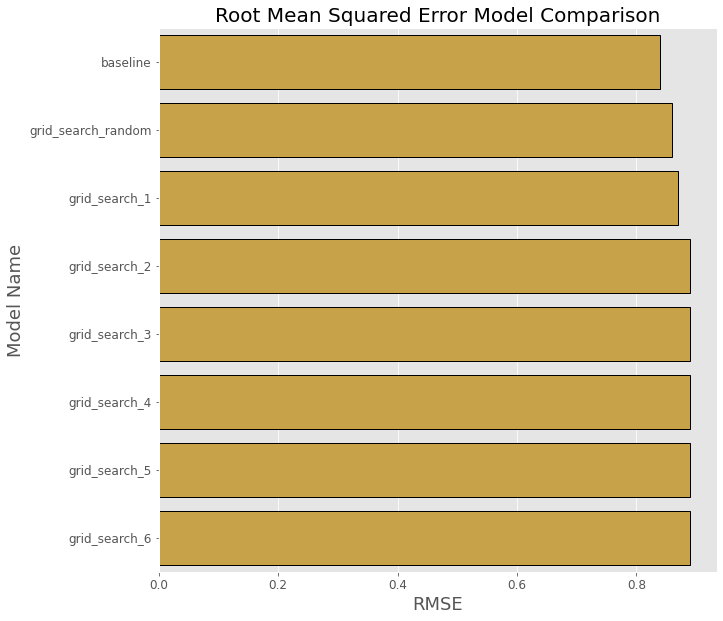

In [360]:
# instantiate the plot
plt.figure(figsize=(10,10))
sns.barplot(x="RMSE", y="Model #", data=model_comp, color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.title('Root Mean Squared Error Model Comparison', size=20)
plt.xlabel('RMSE', size=18)
plt.xticks(size=12)
plt.ylabel('Model Name', size=18)
plt.yticks(size=12)

We can see that the baseline model had the best RMSE score closest to 0, let's see if the following other metrics will back this up. Let's look at the MSE next. 

Text(0, 0.5, 'Model Name')

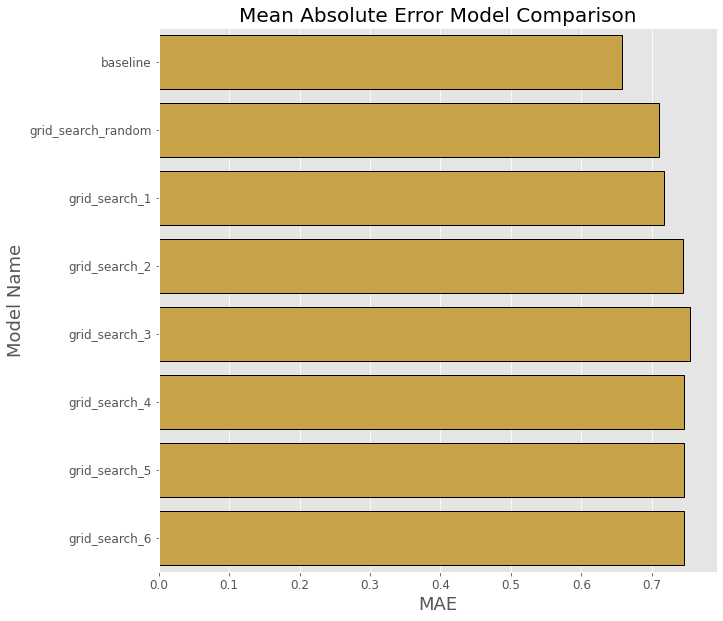

In [362]:
# instantiate the plot
plt.figure(figsize=(10,10))
sns.barplot(x="MAE", y="Model #", data=model_comp, color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.title('Mean Absolute Error Model Comparison', size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('MAE', size=18)
plt.ylabel('Model Name', size=18)

Also shown here, the MAE is closest to 0 for the baseline model, which shows that it's off by that value (which was 0.6579).  Now let's see the MSE and the $R^2$ score. 

Text(0, 0.5, 'Model Name')

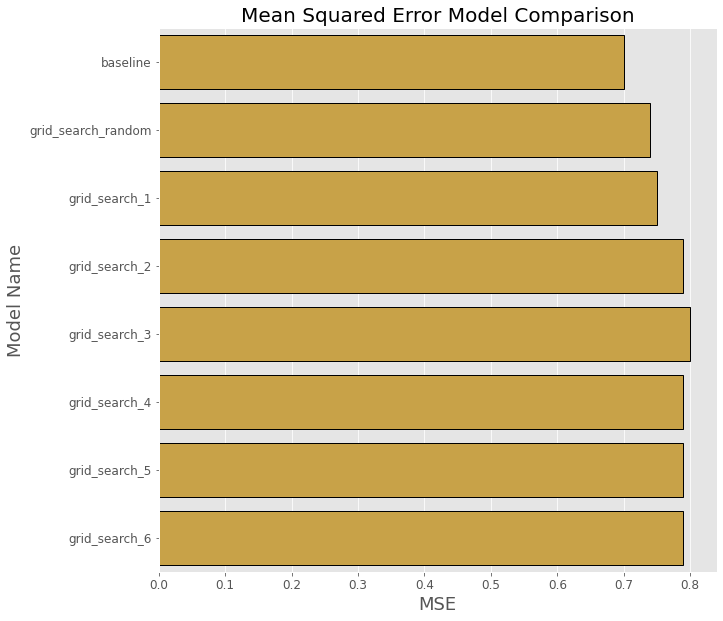

In [363]:
# instantiate the plot
plt.figure(figsize=(10,10))
sns.barplot(x="MSE", y="Model #", data=model_comp, color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.title('Mean Squared Error Model Comparison', size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('MSE', size=18)
plt.ylabel('Model Name', size=18)

Text(0, 0.5, 'Model Name')

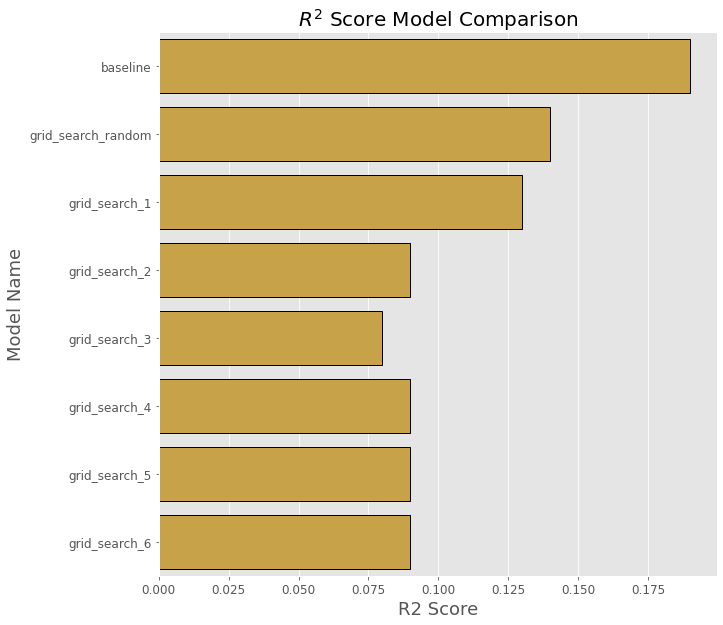

In [364]:
#instantiate the bar plot
plt.figure(figsize=(10,10))
sns.barplot(x="R2 Score", y="Model #", data=model_comp, color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.title('$R^2$ Score Model Comparison', size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('R2 Score', size=18)
plt.ylabel('Model Name', size=18)

The baseline model's (`base_model`) MSE and $R^2$ shows incredible signs of a more-or-less solid fit of the model, with the highest $R^2$ score of 0.19 (and also the lowest MSE). 

The best parameters were: 
- `max_depth` : None
- `min_samples_leaf` : 1
- `min_samples_split` : 2
- `n_estimators`: 100





#### Training Curves

We'll perform `GridSearchCV()` across only one parameter to see how it effects the performance. We'll be looking at the mean fit time, and the mean test score. 

In [288]:
# defining the number of estimators only 
tree_estimators = {'n_estimators': range(0, 300, 10)}

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(base_model, param_grid=tree_estimators, verbose = 2, n_jobs=-1, cv = 5, scoring = 'neg_root_mean_squared_error')
tree_grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [289]:
# take a look at the cross val results
tree_grid_search.cv_results_

{'mean_fit_time': array([0.00160055, 0.01600356, 0.03080645, 0.0472105 , 0.06841536,
        0.07561693, 0.09202051, 0.10862422, 0.12182732, 0.13423004,
        0.14543271, 0.15763521, 0.17463908, 0.18664207, 0.2070466 ,
        0.21404796, 0.23245215, 0.24065399, 0.27046094, 0.26205883,
        0.29546623, 0.30046749, 0.3124701 , 0.32567315, 0.35367947,
        0.35587997, 0.41029201, 0.38848724, 0.40269022, 0.37408404]),
 'std_fit_time': array([4.90018415e-04, 2.78041453e-07, 1.16640847e-03, 7.91125744e-03,
        1.18787615e-02, 1.62539426e-03, 5.72844512e-03, 6.74273163e-03,
        5.26986565e-03, 4.30932711e-03, 6.65271331e-03, 7.84000855e-03,
        4.17712160e-03, 7.36656775e-03, 9.84093270e-03, 7.66997278e-03,
        1.29117704e-02, 8.50131583e-03, 1.75150641e-02, 3.34748042e-03,
        1.24863009e-02, 7.55407091e-03, 3.38304862e-03, 7.81472532e-03,
        1.64550969e-02, 1.11450937e-02, 6.24321694e-03, 1.51372494e-02,
        9.04860831e-03, 1.47412718e-02]),
 'mean_scor

A function for plotting the training time and the score vs number of trees. 

In [376]:
# function for plotting results of cv scores
def plot_results(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    #train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])

    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(15, 10))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'bo-', color = 'darkblue', label = 'test', )
    plt.ylim(ymin = -2, ymax = 0)
    plt.legend
    plt.xlabel(name, size=18)
    plt.xticks(size=12)
    plt.ylabel('Neg Root Mean Squared Error', size=18)
    plt.yticks(size=12)
    plt.title('Score vs %s' % name, size=20)

    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 1)
    plt.xlabel(name, size=18)
    plt.xticks(size=12)
    plt.ylabel('Train Time (sec)', size=18)
    plt.yticks(size=12)
    plt.title('Training Time vs %s' % name, size=20)

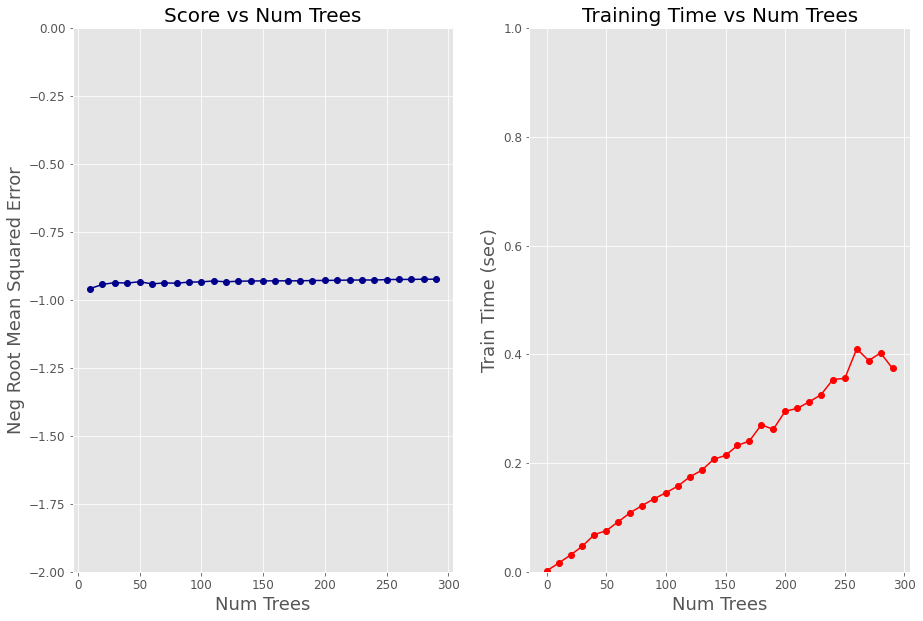

In [377]:
plot_results(tree_grid_search)

We can see the training curve plateau quite quickly, it seems that increasing the number of estimators doesn't have an effect on the RMSE score. 

#### Model Analysis
Now we've evaluated the model, what does this mean? Let's visualize the feature importances from our highest performing model, `base_model`. 

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

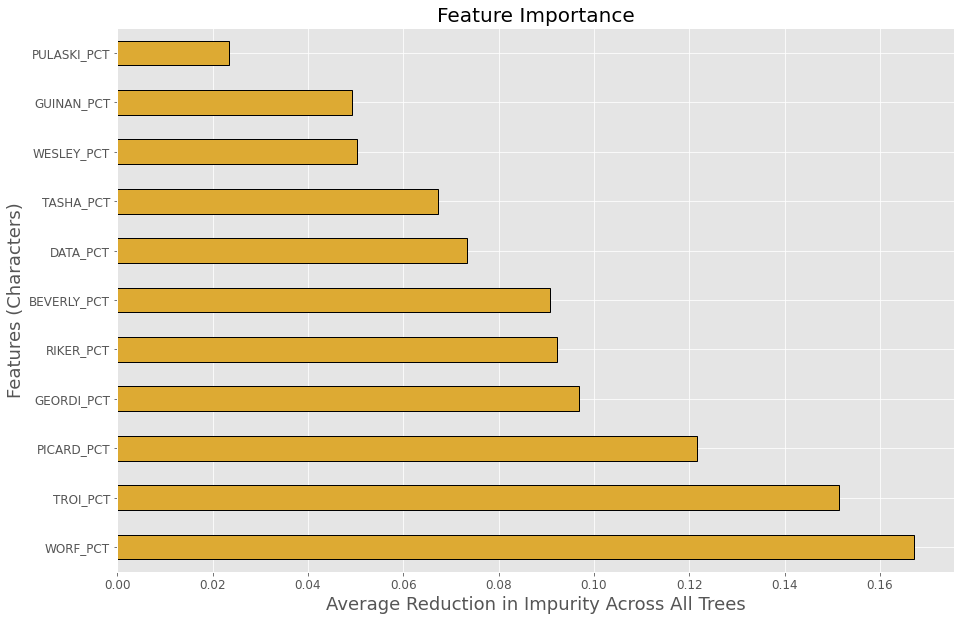

In [344]:
base_model.feature_importances_
plt.figure(figsize=(15,10))
pd.Series(base_model.feature_importances_, index=X.columns).nlargest(11).plot(kind='barh', color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.title('Feature Importance', size=20)
plt.ylabel('Features (Characters)', size=18)
plt.yticks(size=12)
plt.xlabel('Average Reduction in Impurity Across All Trees', size=18)
plt.xticks(size=12)

From the baseline model, we can see that `WORF_PCT`, `TROI_PCT`, and `PICARD_PCT` are the characters that have the most impact either positively or negatively (to be determined) on the `RATING`. More accurately, the model features that tend to split nodes closer to the root of a tree will result in a larger importance value. 


#### SHAP Values (Game Theory)

To visualize this relationship further, I came across a package that uses Shapley values to explain the role each "player" (or features, in this case), has on the outcome (or in our case, the `RATING`). However, Shapley values aren't for "what would happen if", but more for explaining which features have the most impact to the prediction.

The Shapley value is the difference between the base value (prediction), and the actual prediction, the difference is then divided over all the features according to their relative contributions. 

I looked at this [paper](https://christophm.github.io/interpretable-ml-book/shap.html#definition), and this [documentation](https://shap.readthedocs.io/en/latest/index.html) to find more information regarding this. 

Let's take a look at a Shapley summary plot. 


In [264]:
# instantiatie the explainer/shap package
explainer = shap.Explainer(base_model)
shap_values = explainer(X_test)

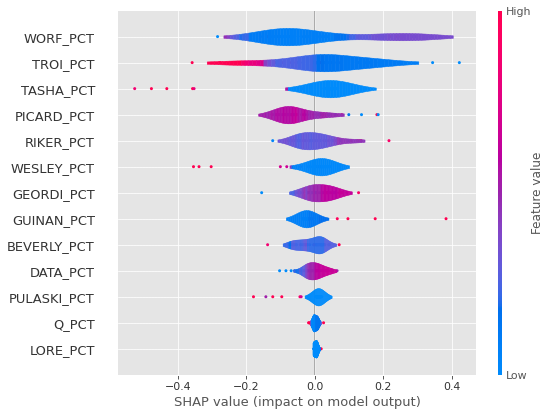

In [328]:
# plot the summary plot
shapsum = shap.summary_plot(shap_values, X_test, plot_type="violin", show=False)


We can see glaring similarities with our Feature Importance bar plot, however we can glean much more information in regards to how much does each "player's" (or feature) role plays in affecting the rating score. In the previous plot, we saw that `WORF_PCT` and `TROI_PCT` has a bigger impact in the model results. We can see this explained clearly here, where we can see if `WORF_PCT` lowers the amount of spoken words, the `RATING` score will be affected negatively. However, if we look at `TROI_PCT` - it shows that if she has a higher percentage of spoken words, the `RATING` score is affected negatively as well. 

However, for other characters like Guinan or Beverly (which have positive effects on the model, according to the summary plot above), have more impact when they appear, however short. In addition to this, I find it interesting that Beverly technically has more words than Troi, but doesn't have a negative impact on the score. There's also Guinan, who has considerably LESS words than any female character that appeared, and they have quite an impact. 

Let's plot a Shapley value bar chart, which will show the Feature Importances as Shapley values (how important each "player's" role is in the outcome of the model). 

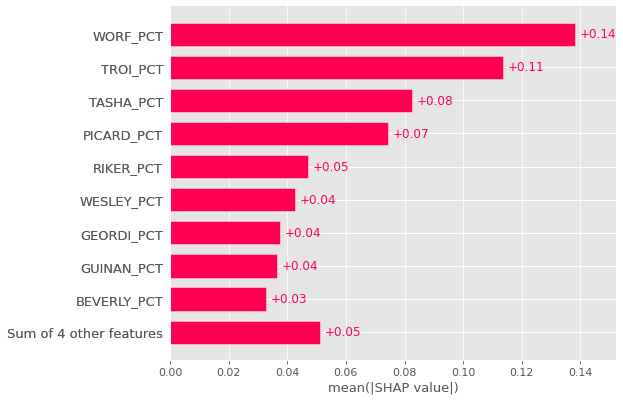

In [266]:
shap.plots.bar(shap_values)

Comparing the Shap values vs our original feature importance bar plot, we can see that the resultant outputs are very similar. However, the only differing importances are that Tasha, Picard, Geordi and Riker are different positions. I believe this is due to the fact that characters like Tasha (who only appeared for one season and a few episodes afterword), have a large impact on the rating score when they did appear - which I assume negatively because the character isn't well-liked. However, for Riker, Geordi and Picard (who are on the main roster of characters) have been demoted in their importance. I think it's because of the fact that Picard, Riker and Geordi speak quite a bit and because of that, their importance wasn't considered as strongly. 

Here's a force plot that shows the "push and pull" relationship between the features/players.

In [338]:
shap.initjs()
explainer = shap.TreeExplainer(base_model)
shap_values = explainer.shap_values(X_test)
def p(j):
    return shap.force_plot(explainer.expected_value, shap_values[j,:], X_test.iloc[j,:]) 
p(0)


In [ ]:
# joblib here?

The force plot shows more intimately how each player does their role in the "game" (which is determining the `RATINGS`). we can see the same information explained to us in a more clear concise way. We can see that `TROI_PCT` and `WORF_PCT` have polar opposite impacts on the outcome. Essentially, what this plot is telling us is if the character's value is negative, their percentage of spoken words for that episode are reduced, and the same applies for the opposite, with a positive value meaning a higher percentage of spoken words in the episode results in a positive or negative `RATING`. We can see this reinforced further with `DATA_PCT` and `GEORDI_PCT`, as these characters are the engineers/scientists (problem solvers) of the cast. It makes sense to me that if those characters spoke more, the episode most likely is a very intensely science or engineering based (for example, the engine/warp core breaking mysteriously or strange intersteller phenomena). 

All players/features on the left side (red) contribute to the rating positively, and the blue side contributes negatively. So, if Troi (`TROI_PCT`) spoke less - the ratings go up, and if Picard (THE CAPTAIN, `PICARD_PCT`) spoke more, the ratings will get lowered.

However, there is a matter that needs to addressed as well, as the time period didn't have exactly the greatest representation for female characters. This graph shows the result of that culture, where if a female character spoke more, the episode is affected poorly. There is one exception though, with Guinan (who's played by Whoopi Goldberg), if she spoke more, the ratings go up! 

## Conclusion/Next Steps

Our purpose with this notebook was to determine if it's possible to predict the outcome of the episode rating based on how much the characters spoke. Within the dataframe, each character's spoken part was a percentage value based out of the entire episode, and we used this information to make predictions using regression models that showed us incredibly compelling information. 

Production companies would find that using these types of models could potentially save them money, and give reliable insights on how much each characters spoken parts really matter to the outcome of the rating. To take this to the next level, I plan to expand this analysis further by incoporating more NLP tactics to acquire more specific information regards the contents of these spoken parts. It's one thing to know how much a character speaks, and how it affects the ratings, versus knowing *what* the character says and drawing more accurate conclusions from there. 

In addition to that, I would also like to make a live demostration using Streamlit or other tactics to create an interactive sliding scale of each character's percentage parts and see the predicted value according to the trained model. 
